In [1]:
import psutil
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


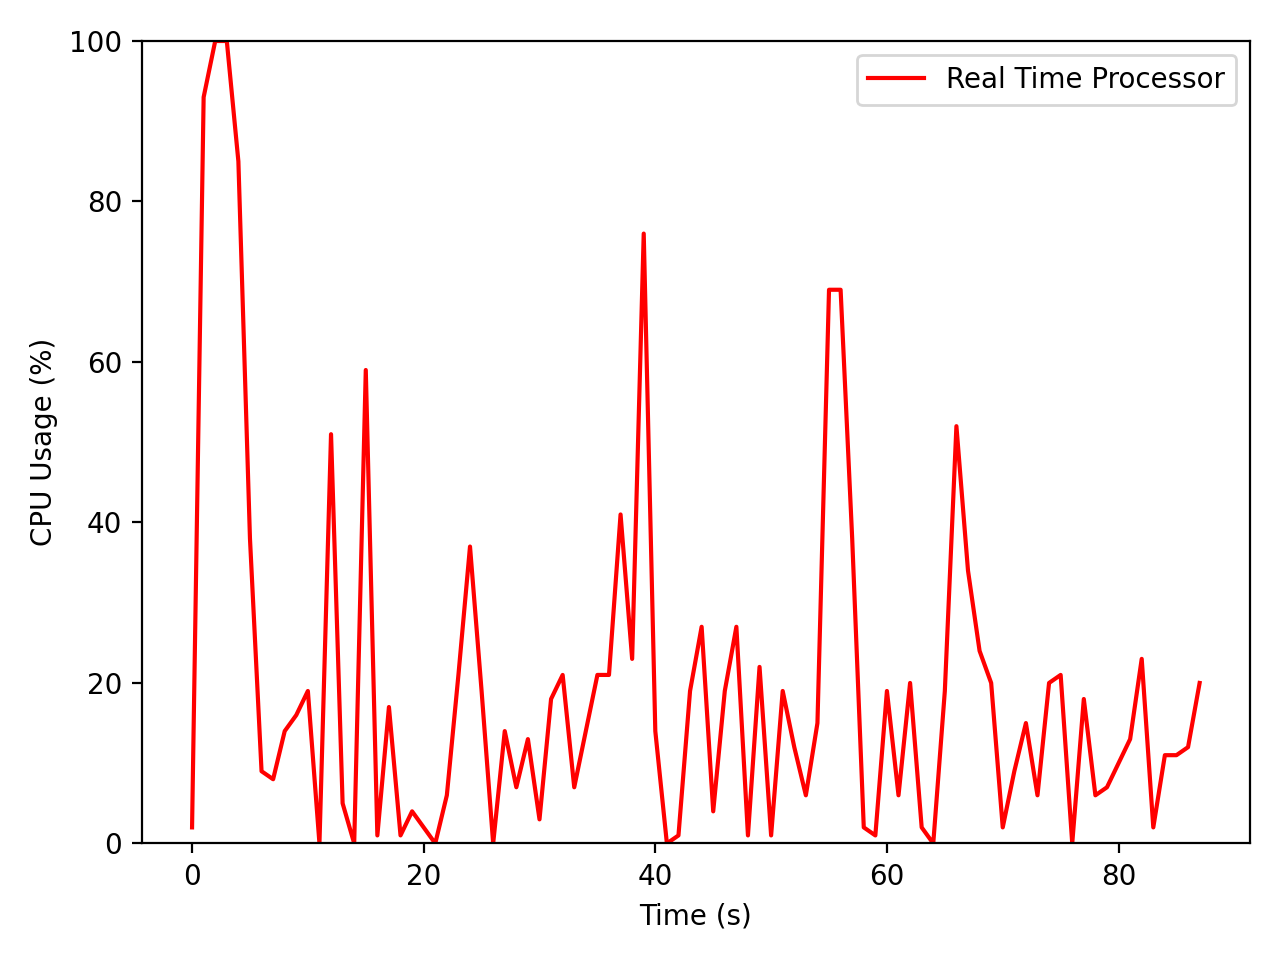

In [4]:
from kafka import KafkaConsumer
Topic_Name = 'test-topic'
consumer = KafkaConsumer(Topic_Name)
# Importing libraries
import psutil
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# Fram size for our plot
fram = 200
# Create an empty list.
y = []
%matplotlib notebook
# Our method
def animate(i):
    # Check for message in consumer
    for message in consumer:
        # Convert the byte message into int value
        value = int.from_bytes(message.value, 'big')        
        # Add that value in to the list.
        y.append(value)
        # Break statement to exit the loop after each run
        break
    # If the length is less than the frame size
    if(len(y) < fram):
        # Clear the axis
        plt.cla()
        # Plot the line with red line and label it
        plt.plot(y, 'r', label = 'Real Time Processor') 
    else:
        # Clear the axis
        plt.cla()
        # Reaching the frame size., plot it with the same values
        plt.plot(y[-fram:], 'r', label = 'Real Time Processor')
    # Adding the graph limits
    plt.ylim(0, 100)
    # Adding the x label
    plt.xlabel('Time (s)')
    # Adding the y label
    plt.ylabel('CPU Usage (%)')
    plt.legend()
    # Setting the layout
    plt.tight_layout()
ani = FuncAnimation(plt.gcf(), animate, interval=1000)